In [ ]:
# Install Python packages
!pip install beautifulsoup4 requests selenium undetected-chromedriver
# Install wget and unzip if not already installed
!apt-get update
!apt-get install -y wget unzip

# Download Google Chrome Stable
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb

# Install Google Chrome
!dpkg -i google-chrome-stable_current_amd64.deb

# Fix any missing dependencies
!apt-get install -f -y
!pip install chromedriver_autoinstaller



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.8 MB/s eta 0:00:00
  Created wheel for undetected-chromedriver: filename=undetected_chromedriver-3.5.5-py3-none-any.whl size=47047 sha256=b5617619ef91b0c94cd64a7398594fe0a44912cb77c9d9aee9b7ba546b9213d1
  Stored in directory: /root/.cache/pip/wheels/cf/a1/db/e1275b6f7259aacd6b045f8bfcb1fcbc93827a3916ba55d5b7
Successfully built undetected-chromedriver
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu ja

In [ ]:
!chromedriver --version
# Check Chrome version
!google-chrome --version

chmod: cannot access '/usr/local/bin/chromedriver': No such file or directory
/bin/bash: line 1: chromedriver: command not found
Google Chrome 129.0.6668.89 


In [ ]:
!which chromedriver
!chromium-browser --version
!chromedriver --version

/bin/bash: line 1: chromium-browser: command not found
/bin/bash: line 1: chromedriver: command not found


**Property Card :**
Hotels address

*   Hotels address
*   Distance from the city center
*   Average price per night for given accommodation type for the data that you have pre-selected [Done]
*   Review score [Done]
*   Hotel rating [Done]
*   Hotel summary/description
*   At least 3 photos of the hotel

In [ ]:
import undetected_chromedriver as uc
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time
import chromedriver_autoinstaller
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
chromedriver_autoinstaller.install()

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)...'  # Replace with your actual User-Agent
}

options = uc.ChromeOptions()
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument(f'user-agent={headers["User-Agent"]}')
options.add_argument('--disable-blink-features=AutomationControlled')
options.add_argument('--headless=new')
options.add_argument('--disable-gpu')
options.add_argument('--window-size=1920,1080')
options.add_argument('--disable-infobars')
options.add_argument('--enable-javascript')


driver = uc.Chrome(options=options)

driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})")

base_url = "https://uk.trip.com"
url = "https://uk.trip.com/hotels/list?city=361&cityName=Milan&provinceId=10168&countryId=106&districtId=0&checkin=2025/01/01&checkout=2025/01/03&barCurr=GBP&searchType=CT&searchWord=Milan&searchValue=19~361_19_361_1&searchCoordinate=3_-1_-1_0~2_-1_-1_0~1_-1_-1_0~NORMAL_45.4654542_9.186516_0&crn=1&adult=1&children=0&searchBoxArg=t&travelPurpose=0&ctm_ref=ix_sb_dl&domestic=true&listFilters=17~1*17*1*2,80~3~1*80*3*2,29~1*29*1~1*2&locale=en-GB&curr=EUR"
driver.get(url)

time.sleep(5)

html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')

hotel_name_list = []
hotel_image_list = []
hotel_price_list = []
hotel_rating_list =[]
hotel_review_score_list = []
distance_from_center_list = []
hotel_address_list = []
hotel_summary_list = []


hotel_info_div = soup.find_all('div', class_='hotel-info')

while len(hotel_info_div) < 60:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    time.sleep(2)

    html = driver.page_source

    soup = BeautifulSoup(html, 'html.parser')
    time.sleep(2)
    hotel_info_div = soup.find_all('div', class_='hotel-info')
    print(f"Number of hotels found: {len(hotel_info_div)}")

def getHotelDetails(link):
  # print(link)
  if link:
        driver.get(link)
        time.sleep(2)
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        # print(soup.prettify())

        # Find the address element (adjust the selector based on the actual HTML structure)
        address_element = soup.find('span', class_='headInit_headInit-address_text__D_Atv')
        summary_element = soup.find('div', class_='hotelOverview_hotelOverview-container__XwS4Z')
        # print(summary_element)

        # Check if the element exists
        if summary_element:
            # Extract text from the div, replacing <br/> tags with newlines
            summary = summary_element.get_text(separator='\n', strip=True)
        else :
            summary = "No summary found"


        #Images
        h_images = []
        images = soup.find_all('img', class_='headAlbum_headAlbum_img__vfjQm')
        for i in range(0, len(images)):
            h_images.append(images[i]['src'])
            if i==3:
                break

        return {
          'address': address_element.text.strip(),
          'summary': summary,
          'images': h_images
        }


for listing in hotel_info_div:
    # print(listing.prettify())

    # 1. Find the title of the hotel
    title = listing.find('a', {'class': 'name'})

    # 2. Find the number of stars
    star_elements = listing.findAll('i', class_='own-star')
    star_count = len(star_elements)

    # 3. Find the score
    score = listing.find('div', class_='score').find('span', class_='real').text.strip()

    # 4. Find the price
    price = listing.find('div', class_='whole').find('div').text.strip()

    # Summary, addres, images
    link = base_url + title.get('href')
    hotel_details = getHotelDetails(link)

    address = hotel_details['address']
    summary = hotel_details['summary']
    images = hotel_details['images']

    # # Print the extracted information
    # print(f"Title: {title.text}")
    # print(f"Star Rating: {star_count} stars")
    # print(f"Score: {score}")
    # print(f"Price: {price}")
    # print(f"Address: {address}")
    # print(f"Summary: {summary}")
    # print(f"Images: {images}")

    hotel_summary_list.append(summary)
    hotel_name_list.append(title.text)
    hotel_image_list.append(images)
    hotel_price_list.append(float(price[1:]))
    hotel_rating_list.append(int(star_count))
    hotel_review_score_list.append(float(score))
    distance_from_center_list.append(0)
    hotel_address_list.append(address)

# Close the driver
driver.quit()


Number of hotels found: 12
Number of hotels found: 22
Number of hotels found: 32
Number of hotels found: 41
Number of hotels found: 51
Number of hotels found: 60


In [ ]:
# Importing numpy to use the fillna and isna methods
import numpy as np
import pandas as pd
df = pd.DataFrame({'name': hotel_name_list, 'price (in €)': hotel_price_list, 'rating (out of 5)': hotel_rating_list,
                   'review score': hotel_review_score_list, 'distance from center (in KM)': distance_from_center_list,
                   'address': hotel_address_list, 'images':hotel_image_list, 'summary': hotel_summary_list})

# Making copy of the original dataframe in local device for backup
# df.to_csv("bookingdotcom_with_missing_values.csv")

# Some hotel have no rating, replace the Nan values with median
df["rating (out of 5)"] = df["rating (out of 5)"].fillna(value=np.nan)
df["rating (out of 5)"] = df["rating (out of 5)"].fillna(df["rating (out of 5)"].median())
df["rating (out of 5)"] = df["rating (out of 5)"].astype(int)

# Saving the datafram after replacing the missing values

# df.to_csv("bookingdotcom_without_missing_values.csv")
df.head()

ValueError: No engine for filetype: 'csv'

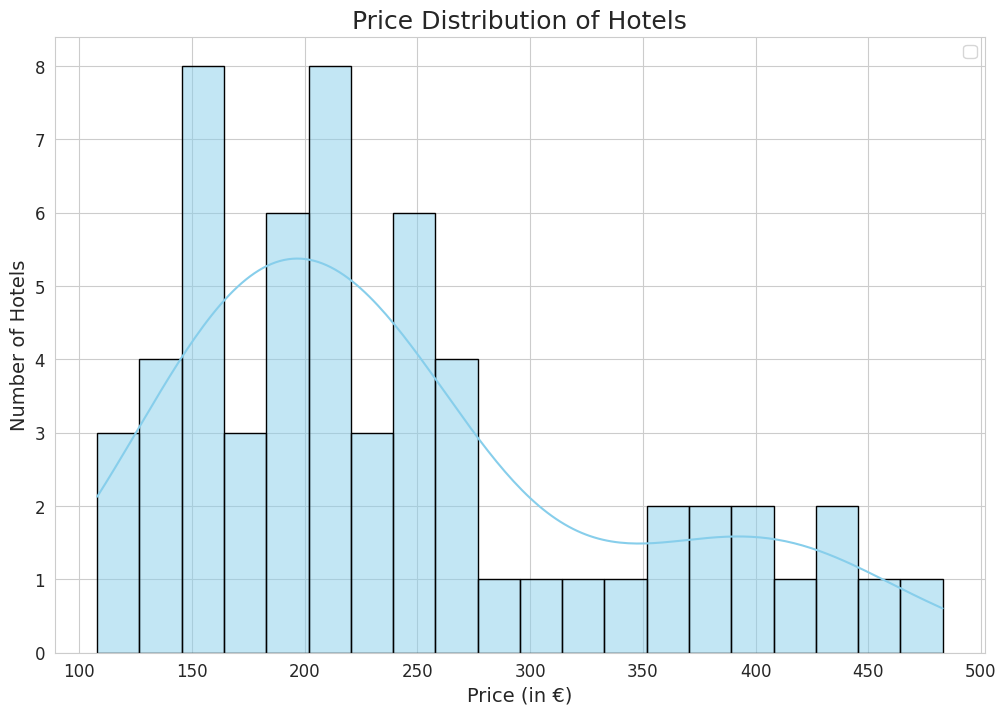

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df['price (in €)'] = df['price (in €)'].astype(float)

sns.set_style("whitegrid")
sns.set_palette("Set2")

fig, ax = plt.subplots(figsize=(12, 8))

sns.histplot(
    data=df,
    x='price (in €)',
    bins=20,
    kde=True,
    color='skyblue',
    edgecolor='black',
    ax=ax,
    stat='count',
)
ax.set_title('Price Distribution of Hotels', fontsize=18)
ax.set_xlabel('Price (in €)', fontsize=14)
ax.set_ylabel('Number of Hotels', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(fontsize=12)
ax.grid(True)
plt.show()


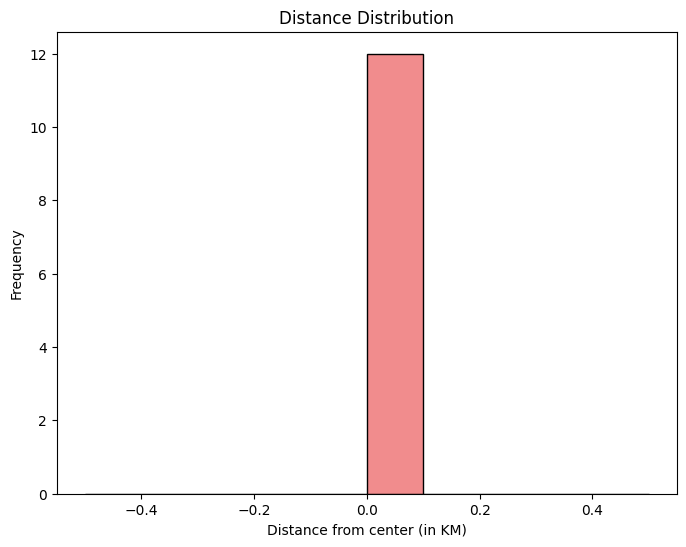

In [ ]:
%matplotlib inline
import matplotlib.pyplot  as plt
import seaborn as sns

sns.set_palette("Set1")

plt.figure(figsize=(8, 6))
sns.histplot(df['distance from center (in KM)'], bins=10, kde=True)
plt.title('Distance Distribution')
plt.xlabel('Distance from center (in KM)')
plt.ylabel('Frequency')
plt.show()

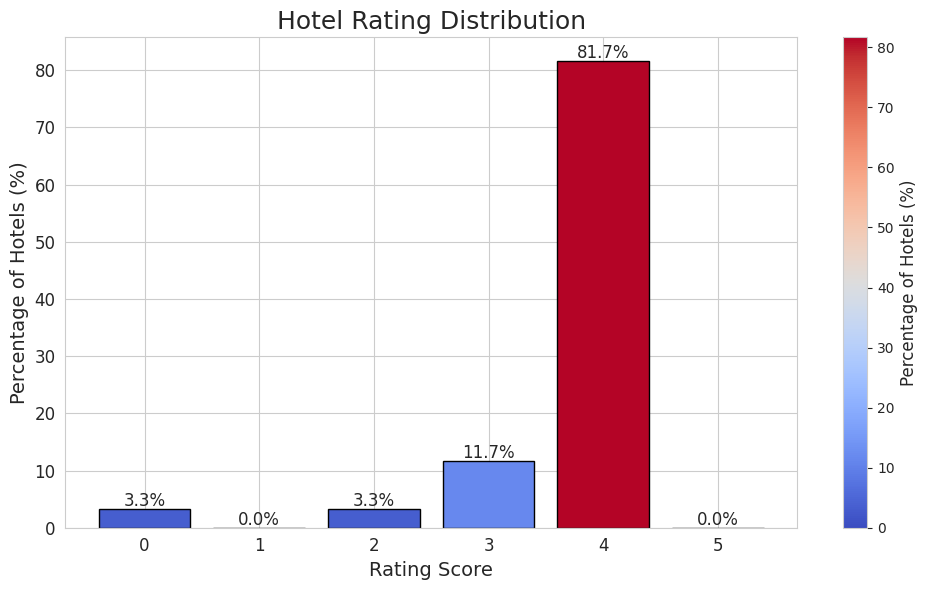

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df['rating (out of 5)'] = pd.to_numeric(df['rating (out of 5)'], errors='coerce')
possible_ratings = [x for x in range(0, 6)]
rating_counts = df['rating (out of 5)'].value_counts().reindex(possible_ratings, fill_value=0)
rating_percentages = (rating_counts / rating_counts.sum()) * 100

rating_df = pd.DataFrame({
    'Rating Score': pd.Categorical(possible_ratings, categories=possible_ratings, ordered=True),
    'Percentage of Hotels': rating_percentages.values
})

cmap = plt.cm.coolwarm
norm = plt.Normalize(rating_percentages.min(), rating_percentages.max())
colors = cmap(norm(rating_df['Percentage of Hotels']))

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(
    rating_df['Rating Score'].astype(str),
    rating_df['Percentage of Hotels'],
    color=colors,
    edgecolor='black'
)

ax.set_title('Hotel Rating Distribution', fontsize=18)
ax.set_xlabel('Rating Score', fontsize=14)
ax.set_ylabel('Percentage of Hotels (%)', fontsize=14)
ax.tick_params(axis='both', labelsize=12)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax).set_label('Percentage of Hotels (%)', fontsize=12)

for bar, percentage in zip(bars, rating_df['Percentage of Hotels']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f'{percentage:.1f}%',
        ha='center',
        fontsize=12
    )

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


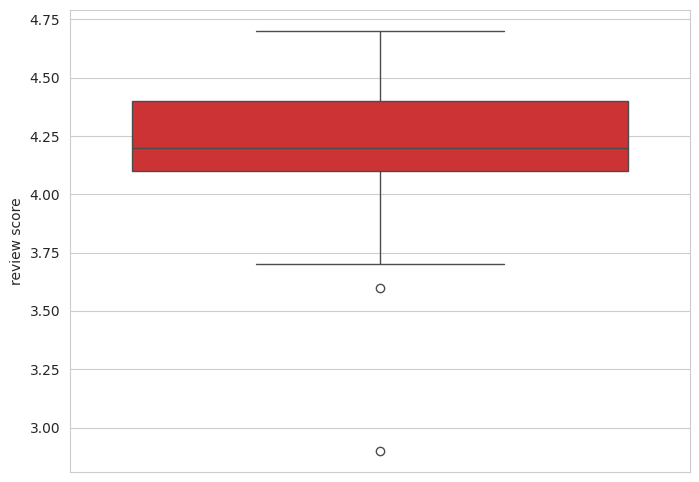

In [ ]:
%matplotlib inline
import matplotlib.pyplot  as plt
import seaborn as sns

sns.set_palette("Set1")

plt.figure(figsize=(8, 6))
sns.boxplot(df['review score'])
plt.show()

In [ ]:
from IPython.display import Image, display, HTML

price_min = float(input("Enter lowest price value: "))
price_max = float(input("Enter highest price value: "))
# distance_min = float(input("Enter minimum distance from center value (in KM): "))
# distance_max = float(input("Enter maximum distance from center value (in KM): "))
review_min = float(input("Enter minimum review score value (1 - 5): "))
review_max = float(input("Enter maximum review score value (1 - 5): "))
rating_min = int(input("Enter the minimum hotel rating (out of 5) value: "))



# Filtering the DataFrame based on user input
new_df = df[(df['price (in €)'] >= price_min) & (df['price (in €)'] <= price_max) &
                #  (df['distance from center (in KM)'] >= distance_min) &
                #  (df['distance from center (in KM)'] <= distance_max) &
                 (df['review score'] >= review_min) & (df['review score'] <= review_max) &
                 (df['rating (out of 5)'].astype('int') >= rating_min)
           ]

def sort_by(input_value):
    if input_value == 1:
        return "price (in €)"
    # if input_value == 2:
    #     return "distance from center (in KM)"
    if input_value == 2:
        return "review score"
    if input_value == 3:
        return "rating (out of 5)"
    else:
        return "price (in €)"

input_value = float(input("How do you want it to be sorted by?: \n Enter 1 to sort it by price \n Enter 2 to sort it by review score \n Enter 3 to sort it by rating \n"))

# Sorting by price and distance in a ascending order but
# sort them in descending order if sorted by review score
asc = True
if input_value == 3 or input_value == 4:
    asc = False
sorted_df = new_df.sort_values(by=sort_by(input_value), ascending=asc)

# Output the first sorted 10 hotels
result = sorted_df.head(10)

print(f"\n======================= RESULTS sorted by {sort_by(input_value)}=========================\n")


# Checking if the search parameter doesn't hold true
def display_hotel_details(row):
  image = None
  if row['images']:
        image = row['images'][0]
  html = f"""
  <div style="display: flex; align-items: center; margin-bottom: 20px;">
          <img src="{image}" alt="{row['name']}" style="width: 200px; height: auto; margin-right: 20px;">
      <div>
          <h4 style="font-size:18px"> <strong>{row['name']}</strong></h4><br>
          <i><strong>Price (in €):</strong></i> {row['price (in €)']}<br>
          # <i><strong>Distance from center (in KM):</strong></i> {row['distance from center (in KM)']}<br>
          <i><strong>Review Score:</strong></i> {row['review score']}<br>
          <i><strong>Rating (out of 5):</strong></i> {row['rating (out of 5)']}<br>
          <i><strong>Address:</strong></i> {row['address']}<br>
      </div>
  </div>
  """
  display(HTML(html))


# Display three more pictures of the hotel when a user wants to see details of a particular hotel
def display_more_hotel_pictures(row):
    print("Here some more photos of the hotel :)")
    html = """
    <div style="display: flex; align-items: center; margin-bottom: 20px;">
    """
    for i in range(1, len(row['images'])):
        html += f"""
        <div style="margin-right: 20px;">
            <img src="{row['images'][i]}" alt="{row['name']}" style="width: 200px; height: auto;">
        </div>
        """
    html += """
    </div>
    """

    html += f"""
    <div>
        <p style="font-size: 16px; color: #555;">{row['summary']}</p>
    </div>
    """

    display(HTML(html))

if result.empty:
  print("Nothing to display :)")
else:
  for index, row in result.iterrows():
      display_hotel_details(row)
  print("\n")
  hotel_name = input("Enter full name of the hotel to see more details: ")
  hotel = df[df['name']==hotel_name]

  if not hotel.empty:
    hotel = hotel.iloc[0,:]
    print("\n\n +++++++++++++++++++++++ More detailed info +++++++++++++++++++")
    display_hotel_details(hotel)
    display_more_hotel_pictures(hotel)
  else:
    print("\n Try another name or please write the full name of the hotel")


Enter lowest price value: 100
Enter highest price value: 400
Enter minimum review score value (1 - 5): 1
Enter maximum review score value (1 - 5): 5
Enter the minimum hotel rating (out of 5) value: 0
How do you want it to be sorted by?: 
 Enter 1 to sort it by price 
 Enter 2 to sort it by review score 
 Enter 3 to sort it by rating 
3

======================= RESULTS sorted by rating (out of 5)=========================





Enter full name of the hotel to see more details: Holiday Inn Nord-Zara


 +++++++++++++++++++++++ More detailed info +++++++++++++++++++


Here some more photos of the hotel :)
